In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import the data to plot
CRindir = '/Volumes/My Passport/coarse_run/'
HRindir = '/Volumes/My Passport/high_res/'

#import grid params for CR grid

in_file = '%sgrid/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)

in_file = '%sgrid/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(160,360)

in_file = '%sgrid/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)

## pick a nutrient 0 = phosphate, 1 = nitrate, 2 = iron, 3 = silica
v=1

# import CR data

in_file = '%supflux/CR_WN.1999.data' % CRindir
CRWN = np.fromfile(in_file, dtype='>f').reshape(4,160, 360)

# import HR data
in_file = '/Users/sclayton/Google Drive/work/comparison/data/annual/HR2CR/HR2CR_WN.1999.data'
HRWN = np.fromfile(in_file, dtype='>f').reshape(4,160,360)


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


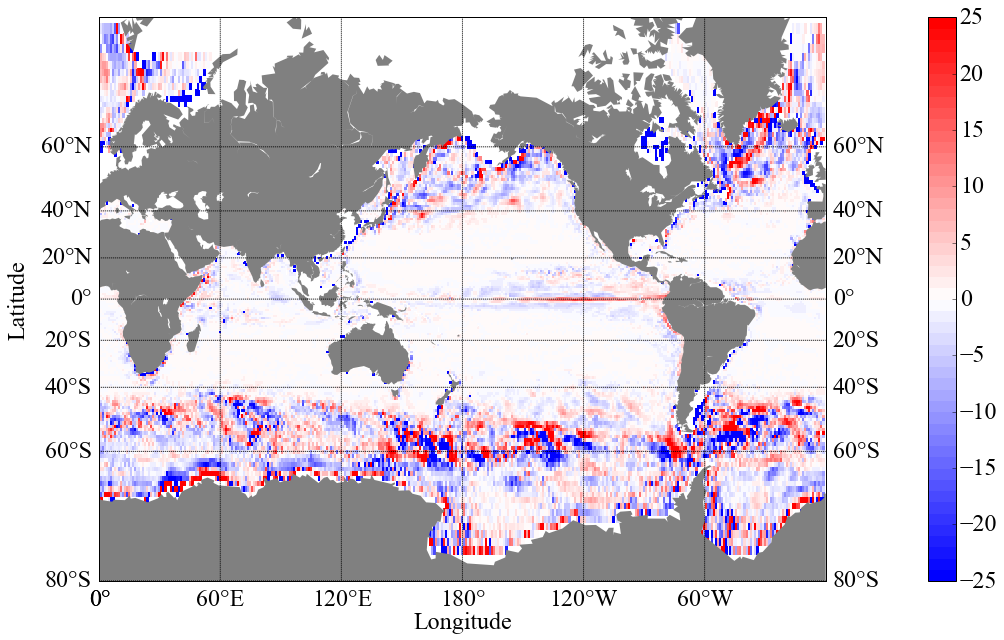

In [4]:
fig1 = plt.figure(1, figsize=(18,9), dpi = 600)
v=1
palette = plt.get_cmap('bwr', 50)

diff = HRWN[v, :,:]-CRWN[v,:,:]
diff = ma.masked_where(HFCR[6,:,:]==0, diff, copy =False)

#x=mit.rdmds('XG'); y=mit.rdmds('YG'); e=mit.rdmds('Eta',np.Inf)
mp = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=0,urcrnrlon=360,lat_ts = 0, resolution='c')
xm, ym = mp(XC,YC)
#mp.contour(xm, ym, HFCR, [0], colors='k', lw=1)
mp.pcolormesh(xm, ym, diff,shading='flat', vmin= -25, vmax = 25, cmap = palette)

mp.fillcontinents(color = 'grey')
mp.drawmapboundary()
mp.drawparallels(np.arange(-80,80,20),labels=[1,1,0,1], fontsize=24)
mp.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1], fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Longitude', fontsize = 24, labelpad = 30)
plt.ylabel('Latitude', fontsize = 24, labelpad = 70)

cbar = plt.colorbar(pad = 0.08)
cbar.ax.tick_params(labelsize=24)

plt.show()

#plt.pcolormesh(XG, YG,HFHR,shading='flat', vmin= -2, vmax = 2,cmap = palette)
#plt.axis([-180, 180, -80, 80])
#plt.colorbar()
#plt.show()


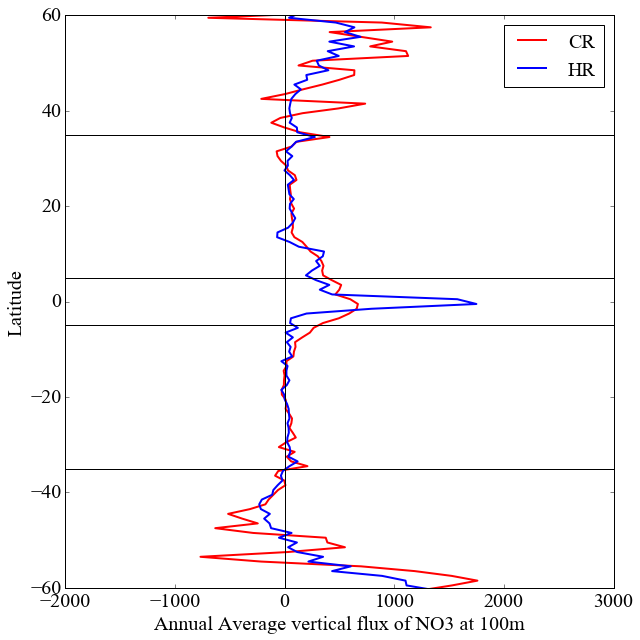

In [17]:
# work out the latitudinally averaged vertical nutrient supply

for v in range(4):
    tmp = HRWN[v,:,:]
    tmp[[HFCR[6,:,:] == 0]] = np.nan
    HRWN[v,:,:] = tmp

    tmp = CRWN[v,:,:]
    tmp[[HFCR[6,:,:] == 0]] = np.nan
    CRWN[v,:,:] = tmp

binnedcr = np.nanmean(CRWN, axis = 2)*365
binnedhr = np.nanmean(HRWN, axis = 2)*365

fig3 = plt.figure(3, figsize=(9,9), dpi = 600)

v = 1

plt.plot((binnedcr[v,:]),YC[:,0],'-r', label = 'CR', lw =2)
plt.plot((binnedhr[v,:]),YC[:,0],'-b',label= 'HR',lw = 2)
plt.ylabel('Latitude', fontsize=20)
plt.legend(fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'Annual Average vertical flux of NO3 at 100m', fontsize=20)
plt.axvline(0, color='k')
plt.axhline(35, color='k')
plt.axhline(5, color='k')
plt.axhline(-5, color='k')
plt.axhline(-35, color='k')

plt.axis([-2000, 3000, -60,60])

plt.show()


In [ ]:
latmin = [35, 5, -5, -35, -60]
latmax = [60, 35, 5, -5, -35]

region = ['N SPolar', 'N STropic', 'Eq', 'S STropic', 'S SPolar']

for l in range(len(latmax)):
    HRint = HRWN[v,:,:]*HFHR[10,:,:]*RAC
    subset = HRint[(YG>=latmin[l]) & (YG<latmax[l])]
    
    print region[l]
    print 'ECCO2', np.nansum(subset)*365/(np.sum(RAC[(YG>=latmin[l]) & (YG<latmax[l])]))

    CRint = CRWN[v,:,:]*HFCR[6,:,:]*RA
    subset = CRint[(YC>=latmin[l]) & (YC<latmax[l])]
    print 'ECCO-Godae', np.nansum(subset)*365/(np.sum(RA[(YC>=latmin[l]) & (YC<latmax[l])]))
    print '\n'